<a href="https://colab.research.google.com/github/Abinayak03/Deep-learning/blob/main/credit_risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_bureau=pd.read_csv('bureau_data.csv')
df_customers=pd.read_csv("customers.csv")
df_loans=pd.read_csv("loans.csv")

In [ ]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [ ]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [ ]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [ ]:
df=pd.merge(df_customers,df_loans,on='cust_id')
df=pd.merge(df,df_bureau,on='cust_id')

In [ ]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [ ]:
df['default']=df['default'].astype('int64')

In [ ]:
df.default.value_counts()

,count
default,
0,45703
1,4297


In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('default',axis=1)
y=df['default']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)


In [ ]:
df_train.shape

(37500, 33)

In [ ]:
df_test.shape

(12500, 33)

# DATA CLEANING

In [ ]:
df_train.isnull().sum()

,0
cust_id,0
age,0
gender,0
marital_status,0
employment_status,0
income,0
number_of_dependants,0
residence_type,48
years_at_current_address,0
city,0


In [ ]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [ ]:
residence_mode=df_train.residence_type.mode()[0]
residence_mode

'Owned'

In [ ]:
df_train['residence_type'].fillna(residence_mode,inplace=True)

<ipython-input-18-9c2090be1038>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna(residence_mode,inplace=True)


In [ ]:
df_train.isnull().sum()

,0
cust_id,0
age,0
gender,0
marital_status,0
employment_status,0
income,0
number_of_dependants,0
residence_type,0
years_at_current_address,0
city,0


In [ ]:
df_test["residence_type"].fillna(residence_mode,inplace=True)

<ipython-input-20-9a89010af475>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["residence_type"].fillna(residence_mode,inplace=True)


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
continuous_cols=['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [ ]:
categorical_cols=['gender','marital_status','employment_status','residence_type','city','state','zipcode','loan_purpose','loan_type','default']

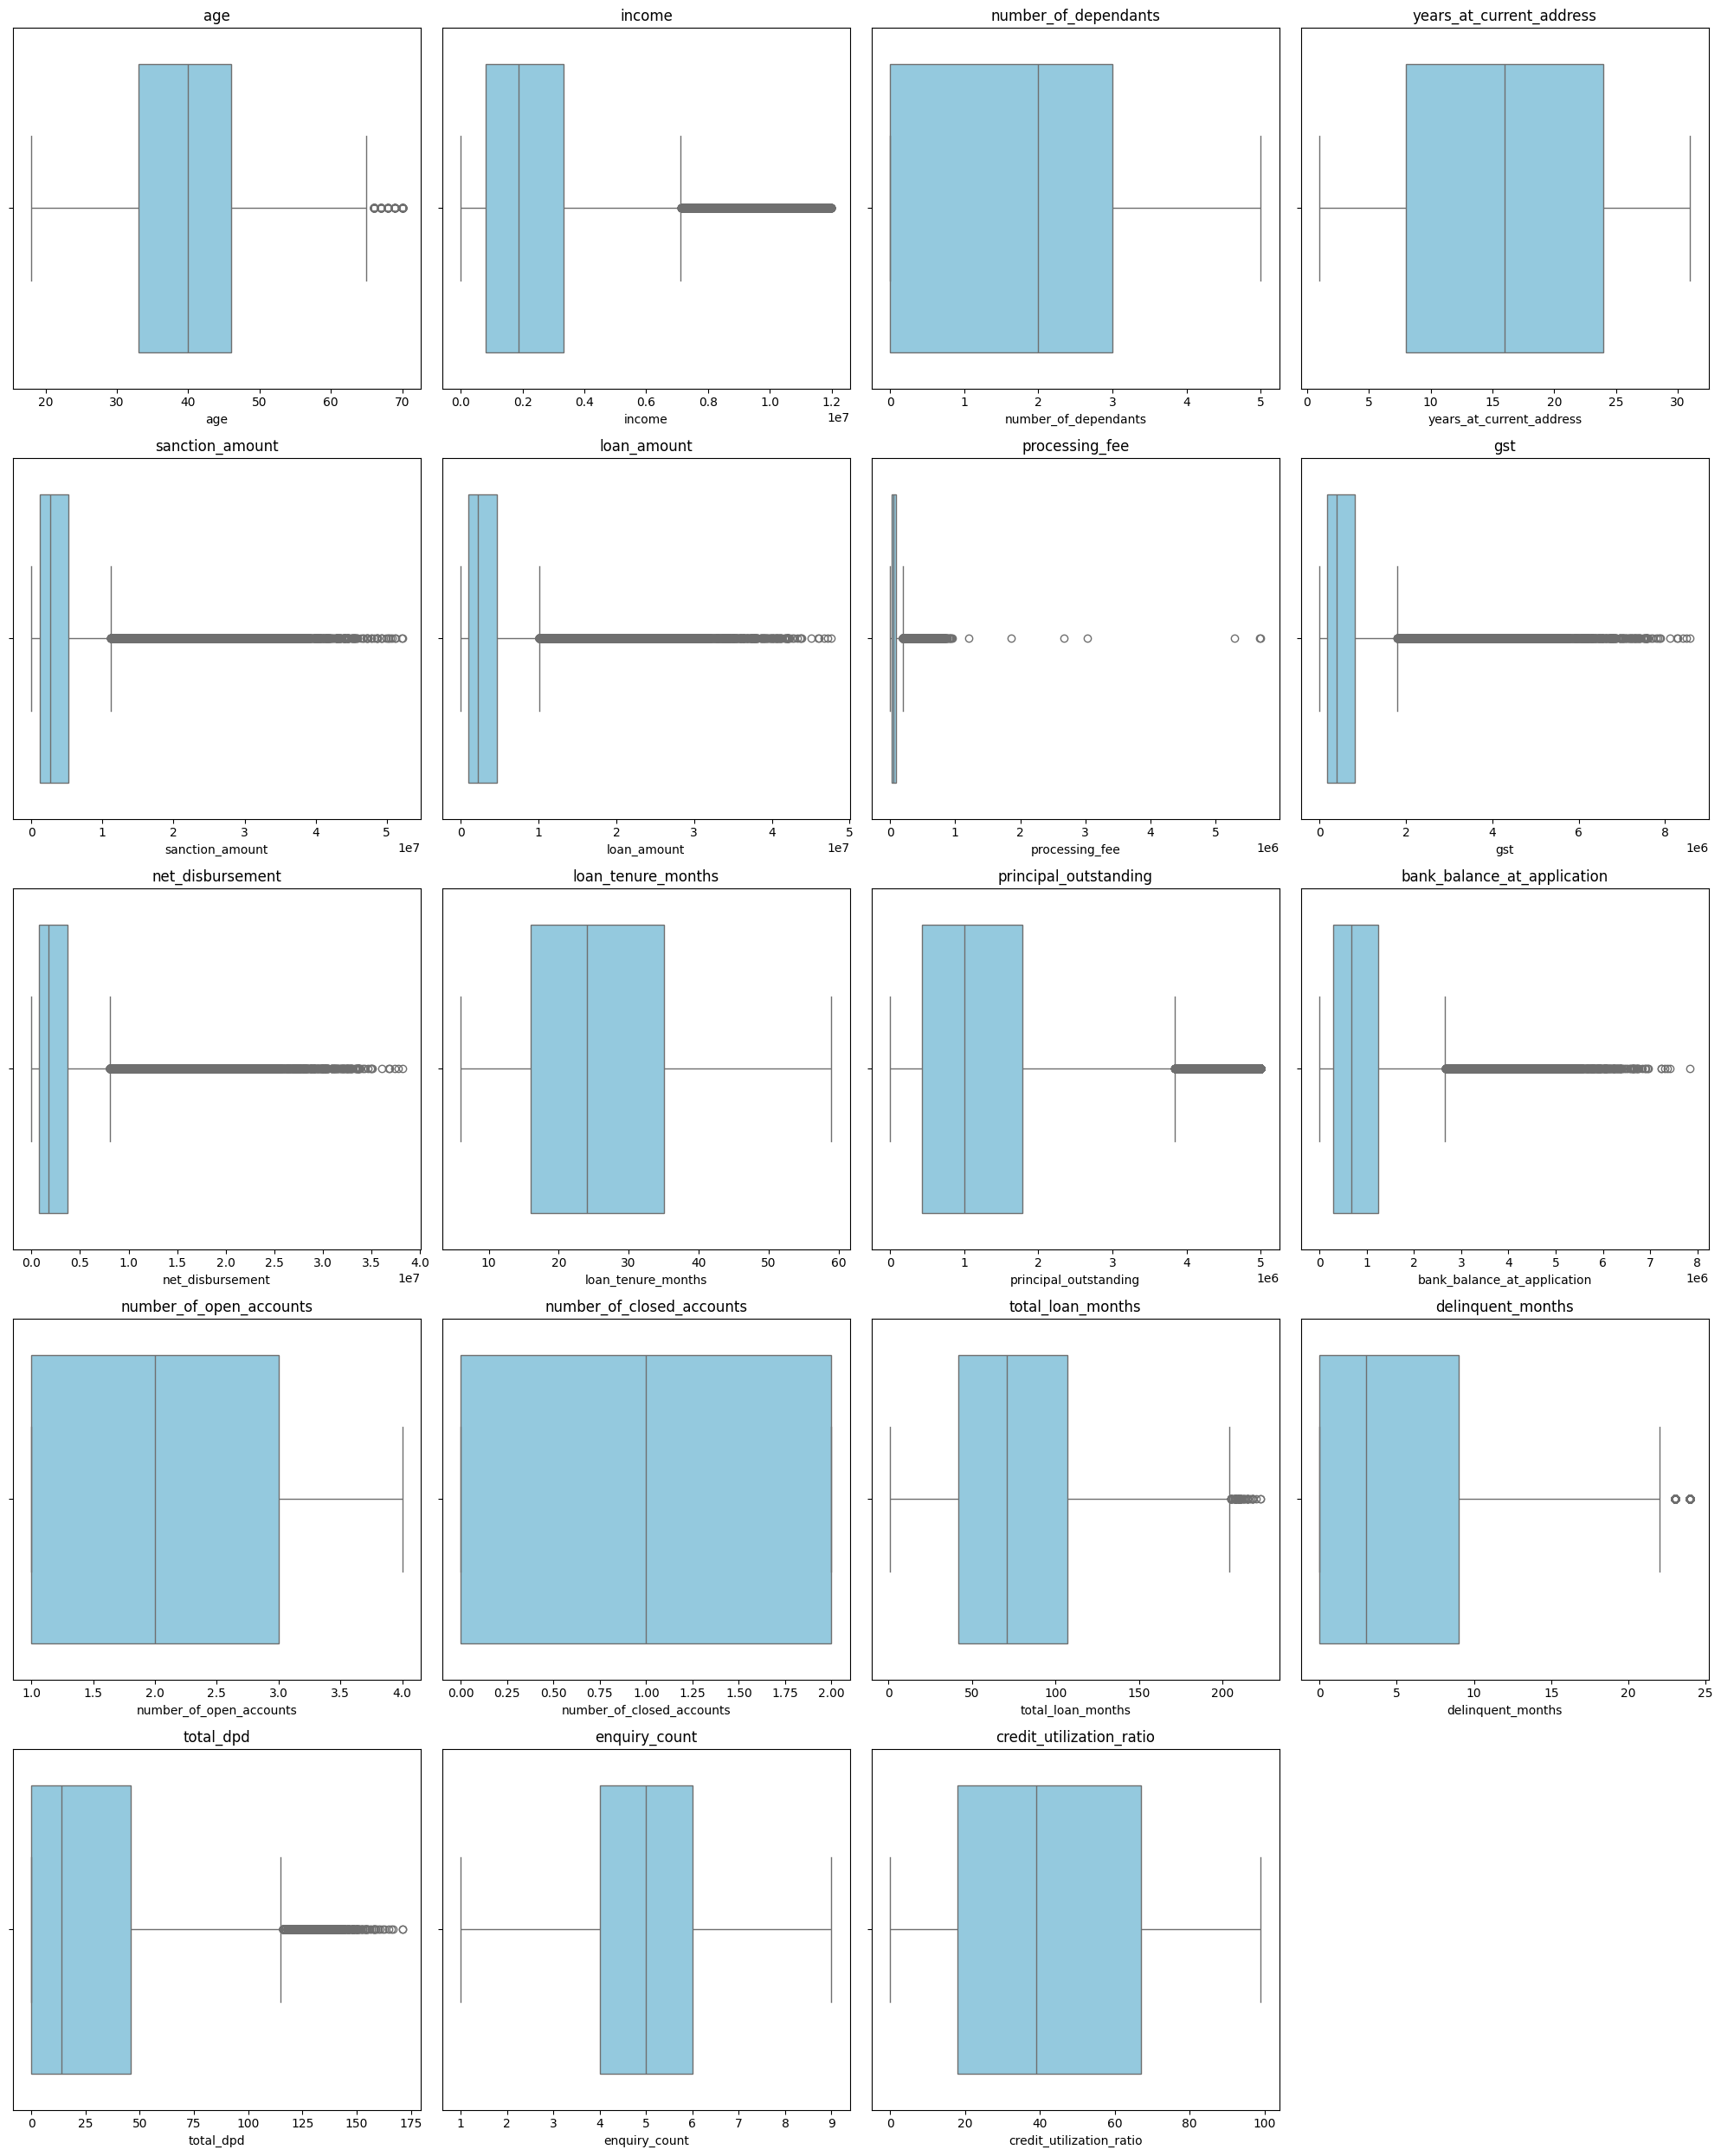

In [ ]:
fig, axes = plt.subplots((len(continuous_cols) - 1) // 4 + 1, 4, figsize=(20, 5 * ((len(continuous_cols) - 1) // 4 + 1)))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(x=df_train[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

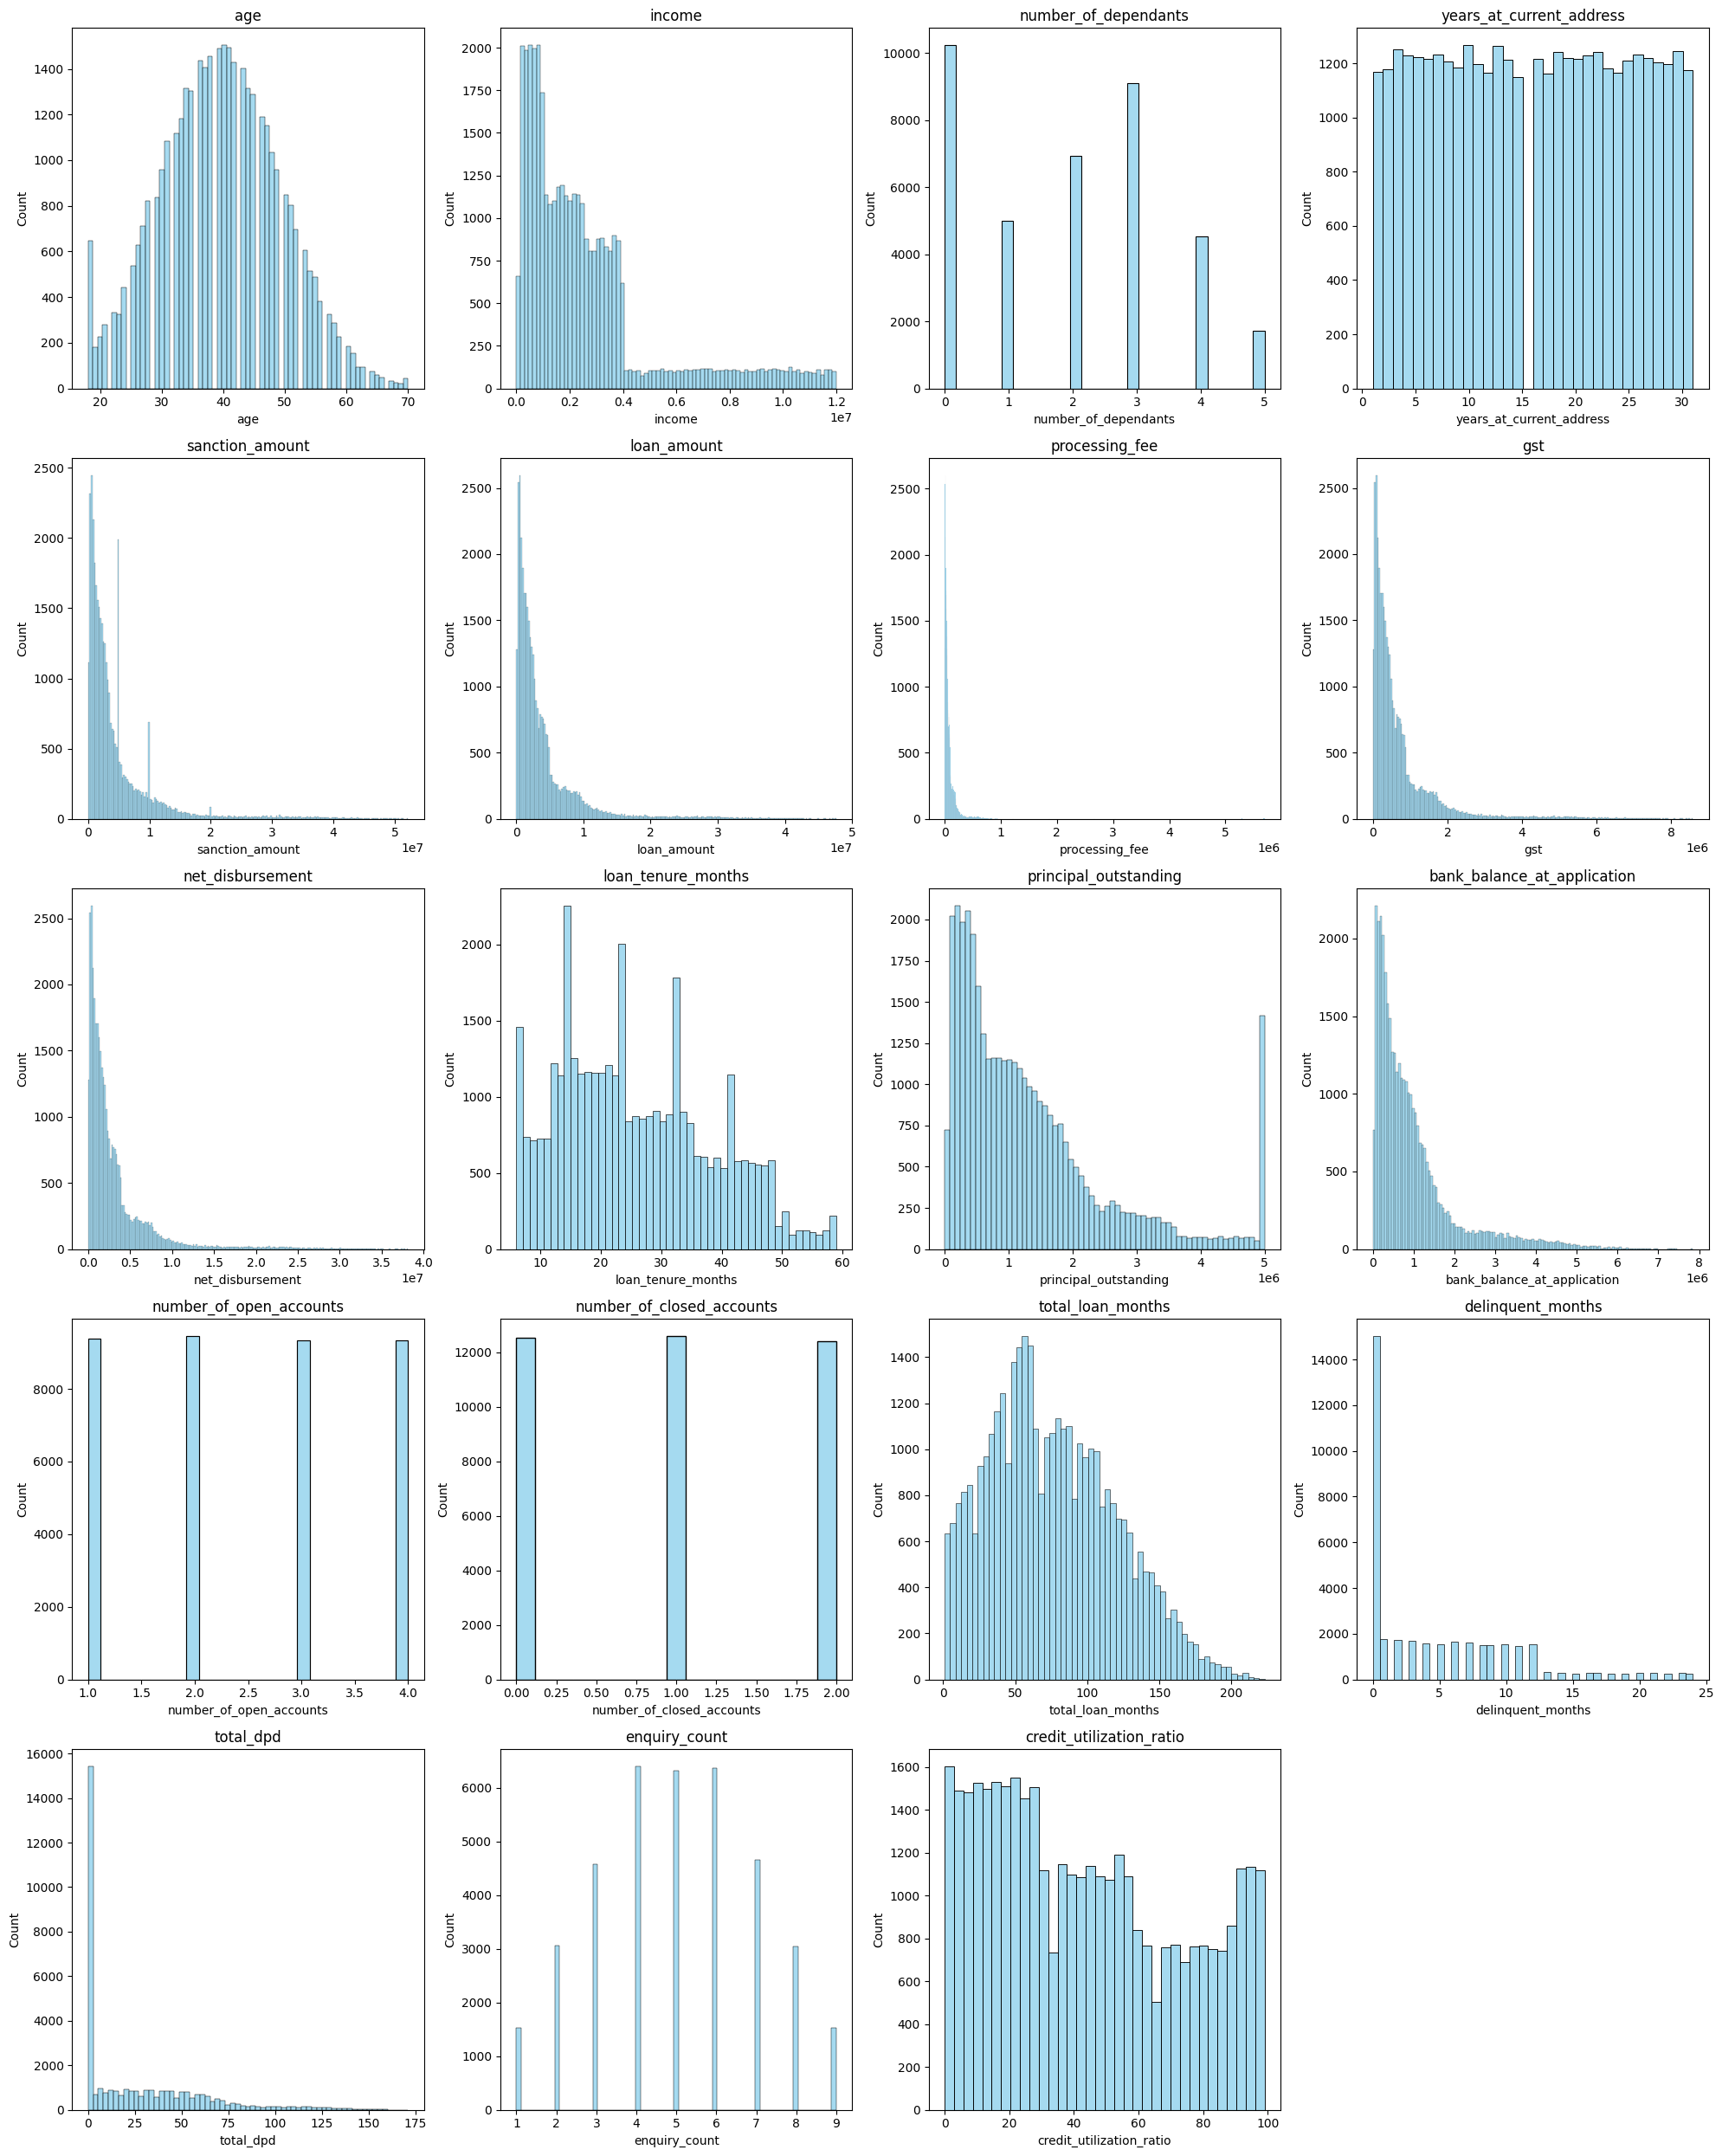

In [ ]:
fig, axes = plt.subplots((len(continuous_cols) - 1) // 4 + 1, 4, figsize=(20, 5 * ((len(continuous_cols) - 1) // 4 + 1)))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.histplot(x=df_train[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

processing fee column is more right skewd

In [ ]:
df_train['processing_fee'].describe()

,processing_fee
count,3.750000e+04
mean,8.072411e+04
std,1.208307e+05
min,0.000000e+00
25%,1.918000e+04
50%,4.470000e+04
75%,9.200000e+04
max,5.698030e+06


In [ ]:
df_train.processing_fee.max()

5698029.900775034

In [ ]:
df_train[df_train.processing_fee==df_train.processing_fee.max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
12294,4639000,5.698030e+06


the above data seems impossible

because mostly processing fee will be only 3 percent of the loan amount




In [ ]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
9898,3626000,5.293544e+06
47089,1738000,1.858965e+06
33705,3812000,5.678021e+06
12294,4639000,5.698030e+06
28174,966000,1.214493e+06
29305,2616000,3.036378e+06


In [ ]:
df_train_1=df_train[(df_train.processing_fee/df_train.loan_amount)<=0.03].copy()

In [ ]:
df_train_1[(df_train.processing_fee/df_train.loan_amount)>0.03][['loan_amount','processing_fee']]

<ipython-input-31-5c1d8c61ac00>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_1[(df_train.processing_fee/df_train.loan_amount)>0.03][['loan_amount','processing_fee']]


,loan_amount,processing_fee


In [ ]:
df_test[(df_test.processing_fee/df_test.loan_amount)>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [ ]:
df_test=df_test[df_test.processing_fee/df_test.loan_amount<=0.03].copy()

In [ ]:
df_test.shape

(12498, 33)

In [ ]:
for col in categorical_cols:
  print(col,"--->",df_train_1[col].unique())

gender ---> ['F' 'M']
marital_status ---> ['Single' 'Married']
employment_status ---> ['Salaried' 'Self-Employed']
residence_type ---> ['Owned' 'Mortgage' 'Rented']
city ---> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state ---> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode ---> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose ---> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type ---> ['Secured' 'Unsecured']
default ---> [0 1]


In [ ]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace("Personaal","Personal")

In [ ]:
df_test['loan_purpose']=df_test['loan_purpose'].replace("Personaal","Personal")

In [ ]:
df_train_1.loan_purpose.unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

# EXPLORATORY DATA ANALYSIS

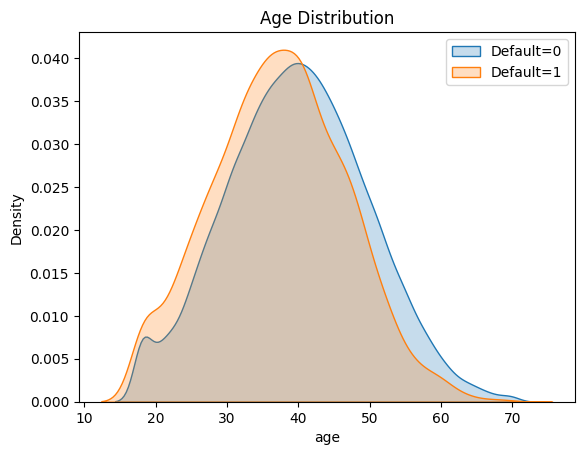

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'],fill=True , label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['age'],fill=True , label="Default=1")
plt.title(f"Age Distribution")
plt.legend()
plt.show()

**INSIGHTS**

orange graph is a lil bit left to blue graph which indicates that people with young age are more likely to default

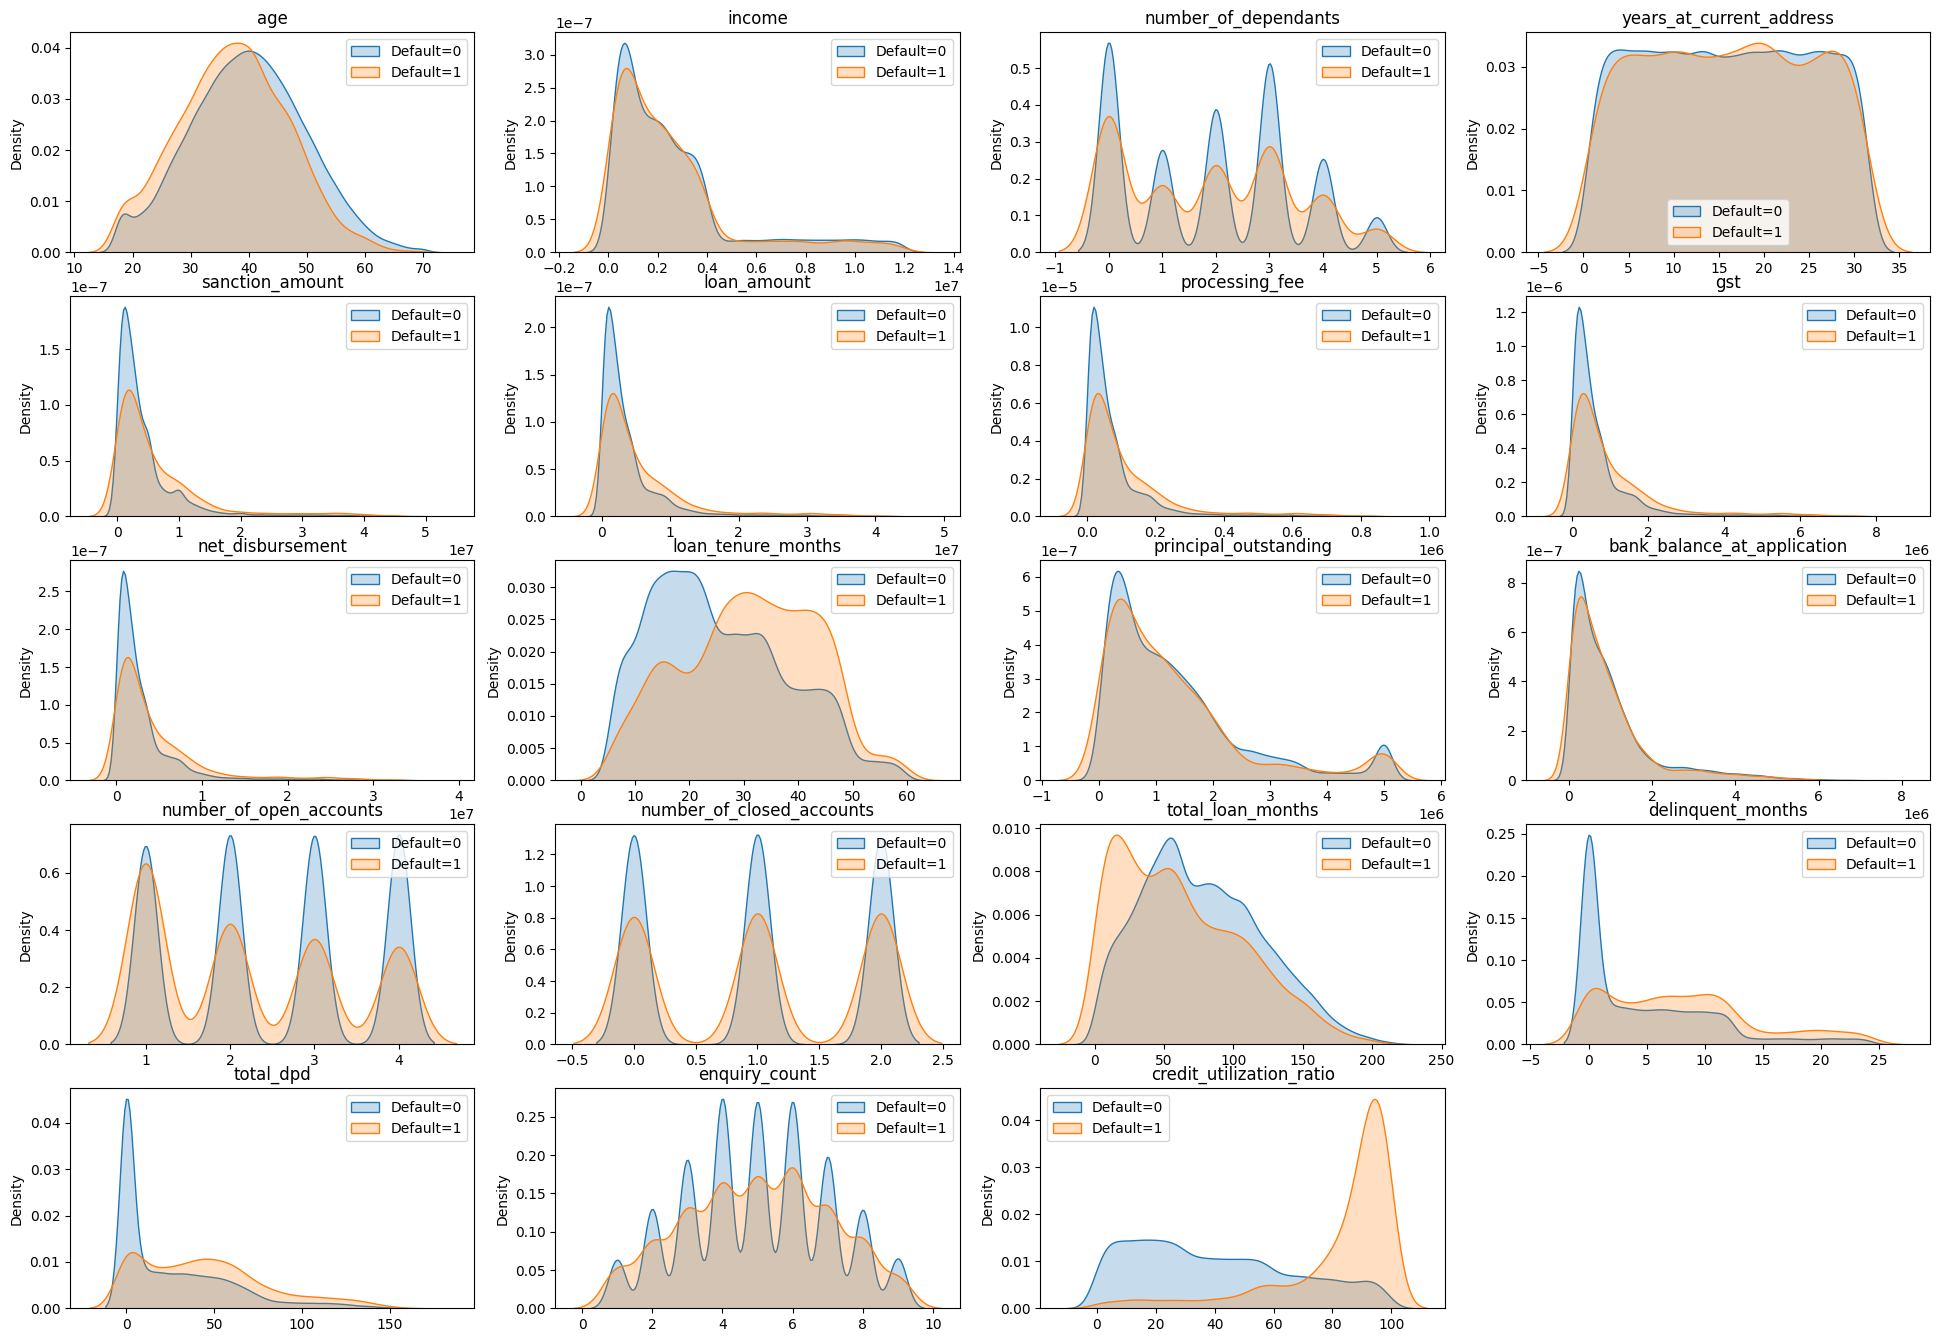

In [ ]:
plt.figure(figsize=(24,20))

for i,col in enumerate(continuous_cols):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train_1[col][df_train_1.default==0],fill=True , label="Default=0")
    sns.kdeplot(df_train_1[col][df_train_1.default==1],fill=True , label="Default=1")
    plt.title(col)
    plt.xlabel("")
    plt.legend()

plt.show()




**INSIGHTS**

1. in credit_utilization_ratio people who utilized most amounts are more likely to default

2. in loan_tenure_months, delinquent_months, total_dpd also we can see some insights

3. why loan_amount and income did not show any signs of being strong predictors??? we will explore later

# FEATURE ENGINEERING

In [ ]:
df_train_1['loan_to_income']=round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1.loan_to_income.describe()

,loan_to_income
count,37487.000000
mean,1.554890
std,0.972907
min,0.300000
25%,0.770000
50%,1.160000
75%,2.450000
max,4.570000


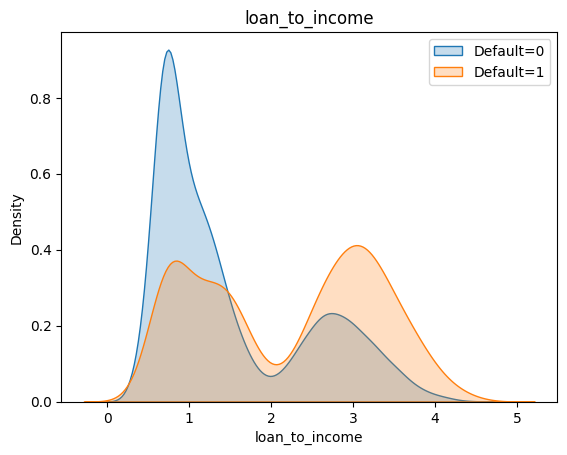

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'],fill=True , label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'],fill=True , label="Default=1")
plt.title(f"loan_to_income")
plt.legend()
plt.show()

In [ ]:
df_train_1['delinquency_ratio']=((df_train_1['delinquent_months']/df_train_1['total_loan_months'])*100).round(1)

In [ ]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      37487 non-null  object 
 1   age                          37487 non-null  int64  
 2   gender                       37487 non-null  object 
 3   marital_status               37487 non-null  object 
 4   employment_status            37487 non-null  object 
 5   income                       37487 non-null  int64  
 6   number_of_dependants         37487 non-null  int64  
 7   residence_type               37487 non-null  object 
 8   years_at_current_address     37487 non-null  int64  
 9   city                         37487 non-null  object 
 10  state                        37487 non-null  object 
 11  zipcode                      37487 non-null  int64  
 12  loan_id                      37487 non-null  object 
 13  loan_purpose     

In [ ]:
df_test['delinquency_ratio']=((df_test['delinquent_months']/df_test['total_loan_months'])*100).round(1)

In [ ]:
df_train_1[['delinquent_months','total_loan_months','delinquency_ratio']].head()

,delinquent_months,total_loan_months,delinquency_ratio
27434,6,90,6.7
13400,4,119,3.4
883,14,83,16.9
7303,0,37,0.0
45124,6,62,9.7


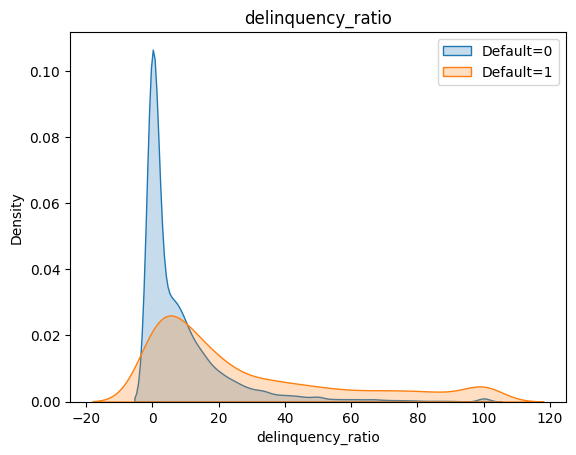

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]['delinquency_ratio'],fill=True , label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['delinquency_ratio'],fill=True , label="Default=1")
plt.title(f"delinquency_ratio")
plt.legend()
plt.show()

In [ ]:
df_train_1['avg_dpd_per_delinquency']=np.where(
    df_train_1['delinquent_months']!=0,
    df_train_1['total_dpd']/df_train_1['delinquent_months'].round(1),0)

df_test['avg_dpd_per_delinquency']=np.where(
    df_test['delinquent_months']!=0,
    df_test['total_dpd']/df_test['delinquent_months'].round(1),0)

In [ ]:
df_train_1.avg_dpd_per_delinquency.isna().sum()

np.int64(0)

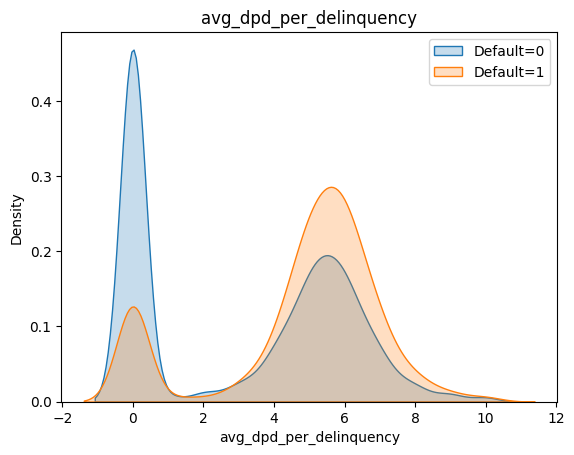

In [ ]:
sns.kdeplot(df_train_1[df_train_1.default==0]['avg_dpd_per_delinquency'],fill=True , label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['avg_dpd_per_delinquency'],fill=True , label="Default=1")
plt.title(f"avg_dpd_per_delinquency")
plt.legend()
plt.show()

In [ ]:
df_test['loan_to_income']=round(df_test['loan_amount']/df_test['income'],2)

In [ ]:
df_train_1.shape,df_test.shape

((37487, 36), (12498, 36))

In [ ]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
df_train_2=df_train_1.drop(['cust_id','loan_id','disbursal_date','income','loan_amount','delinquent_months', 'installment_start_dt','total_dpd','total_loan_months'],axis=1)

In [ ]:
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  int64  
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  int64  
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  int64  
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  int64  
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  sanction_amount              37487 non-null  int64  
 13  processing_fee   

In [ ]:
df_test=df_test.drop(['cust_id','loan_id','disbursal_date','income','loan_amount','delinquent_months', 'installment_start_dt','total_dpd','total_loan_months'],axis=1)

In [ ]:
df_train_2.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
X_train=df_train_2.drop('default',axis=1)
y_train=df_train_2['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale=df_train_2.select_dtypes(['int64', 'float64']).columns.drop(['zipcode','default'])
scaler=MinMaxScaler()
X_train[cols_to_scale]=scaler.fit_transform(X_train[cols_to_scale])

X_train.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.519231,F,Single,Salaried,0.0,Owned,0.133333,Ahmedabad,Gujarat,380001,...,0.339623,0.175096,0.069846,1.000000,1.0,0.875,0.595960,0.608899,0.067,0.550000
13400,0.211538,M,Single,Salaried,0.0,Owned,0.800000,Delhi,Delhi,110001,...,0.509434,0.195995,0.119061,0.666667,0.5,0.375,0.929293,0.182670,0.034,0.425000
883,0.615385,F,Single,Self-Employed,0.0,Mortgage,0.933333,Lucknow,Uttar Pradesh,226001,...,0.245283,0.271233,0.096133,0.333333,0.5,0.375,0.838384,0.084309,0.169,0.557143
7303,0.480769,F,Single,Self-Employed,0.2,Owned,0.866667,Bangalore,Karnataka,560001,...,0.283019,0.026998,0.012511,0.000000,0.5,0.500,0.343434,0.187354,0.000,0.000000
45124,0.250000,F,Single,Salaried,0.0,Owned,0.866667,Jaipur,Rajasthan,302001,...,0.735849,0.007257,0.006171,0.333333,0.0,0.500,0.191919,0.360656,0.097,0.466667


In [ ]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000
mean,0.414681,0.388476,0.499787,418763.450983,0.088989,0.083030,0.083030,0.083030,0.375431,0.261931,0.123683,0.498795,0.498386,0.500410,0.437656,0.293885,0.103943,0.329463
std,0.189510,0.307163,0.297939,168837.508873,0.120709,0.113437,0.113437,0.113437,0.234410,0.244515,0.133507,0.372407,0.407528,0.252997,0.296517,0.227847,0.172686,0.290336
min,0.000000,0.000000,0.000000,110001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,302001.000000,0.020440,0.019100,0.019100,0.019100,0.188679,0.078179,0.034088,0.000000,0.000000,0.375000,0.181818,0.110070,0.000000,0.000000
50%,0.423077,0.400000,0.500000,400001.000000,0.049536,0.045887,0.045887,0.045887,0.339623,0.194385,0.082720,0.333333,0.500000,0.500000,0.393939,0.201405,0.038000,0.433333
75%,0.538462,0.600000,0.766667,560001.000000,0.097660,0.095512,0.095512,0.095512,0.547170,0.353152,0.155525,0.666667,1.000000,0.625000,0.676768,0.503513,0.131000,0.575000
max,1.000000,1.000000,1.000000,700001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test=df_test.drop('default',axis=1)
y_test=df_test['default']

X_test[cols_to_scale]=scaler.transform(X_test[cols_to_scale])

X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,delinquency_ratio,avg_dpd_per_delinquency,loan_to_income
count,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000,12498.000000
mean,0.413678,0.386174,0.503088,420098.055529,0.088840,0.082764,0.082764,0.082764,0.378690,0.263201,0.124546,0.503681,0.506961,0.503471,0.439030,0.104141,0.330726,0.294318
std,0.189011,0.306940,0.296372,169419.472823,0.119051,0.111372,0.111372,0.111372,0.235128,0.245299,0.134018,0.374460,0.405600,0.255602,0.296583,0.173989,0.290738,0.226731
min,0.000000,0.000000,0.000000,110001.000000,0.000019,0.000126,0.000126,0.000126,0.000000,-0.000163,0.000216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,302001.000000,0.021208,0.019725,0.019725,0.019725,0.188679,0.078853,0.034518,0.000000,0.000000,0.375000,0.181818,0.000000,0.000000,0.110070
50%,0.423077,0.400000,0.500000,411001.000000,0.049871,0.046244,0.046244,0.046244,0.358491,0.195309,0.083575,0.666667,0.500000,0.500000,0.393939,0.038000,0.433333,0.203747
75%,0.538462,0.600000,0.766667,560001.000000,0.099138,0.096693,0.096693,0.096693,0.547170,0.354632,0.156611,1.000000,1.000000,0.750000,0.676768,0.129000,0.574728,0.503513
max,1.000000,1.000000,1.000000,700001.000000,0.951002,1.003192,1.003192,1.003192,1.000000,1.000000,0.879450,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.004684


In [ ]:
df_train_2.zipcode.unique()

array([380001, 110001, 226001, 560001, 302001, 500001, 700001, 411001,
       600001, 400001])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  vif_df=pd.DataFrame()
  vif_df['column']=data.columns
  vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range (data.shape[1])]
  return vif_df

In [ ]:
calculate_vif(X_train[cols_to_scale])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,column,VIF
0,age,5.583328
1,number_of_dependants,2.722931
2,years_at_current_address,3.361645
3,sanction_amount,102.151612
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.132182
8,principal_outstanding,16.269132
9,bank_balance_at_application,9.266634


In [ ]:
features_to_drop_vif=['sanction_amount','processing_fee','net_disbursement','principal_outstanding','gst']
X_train_1=X_train.drop(features_to_drop_vif,axis=1)

In [ ]:
numerical_cols=X_train_1.select_dtypes(['int64','float64']).columns
numerical_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
vif_df=calculate_vif(X_train_1[numerical_cols])
vif_df

,column,VIF
0,age,5.547282
1,number_of_dependants,2.733648
2,years_at_current_address,3.449707
3,zipcode,5.596397
4,loan_tenure_months,5.992029
5,bank_balance_at_application,1.806713
6,number_of_open_accounts,4.325332
7,number_of_closed_accounts,2.365621
8,enquiry_count,6.422740
9,credit_utilization_ratio,2.942058


In [ ]:
selected_numeric_features_vif=vif_df.column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

<Axes: >

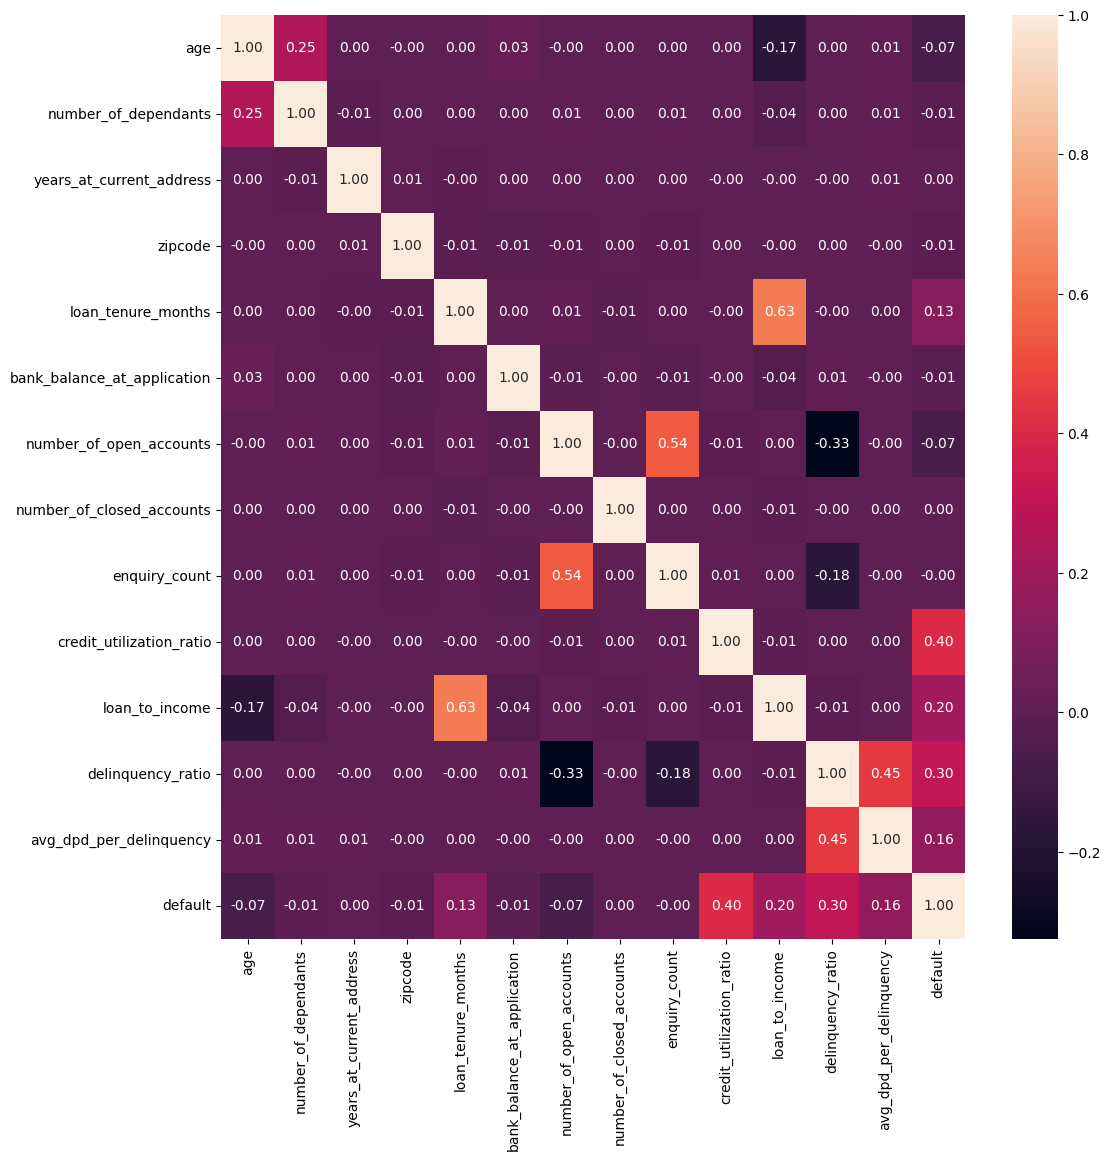

In [ ]:
plt.figure(figsize=(12,12))
cm=df_train_2[numerical_cols.append(pd.Index(['default']))].corr()
sns.heatmap(cm,annot=True,fmt='0.2f')

In [ ]:
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [ ]:
temp=pd.concat([X_train_1,y_train],axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7437,314
Education,5626,546
Home,11271,1744
Personal,13153,585


In [ ]:
def calculate_woe_iv(df,feature,target):
  grouped=df.groupby(feature)[target].agg(['count','sum']) #good means 1 bad means 0
  grouped=grouped.rename(columns={'count':'total','sum':'good'})
  grouped['bad']=grouped['total']-grouped['good']

  grouped['good_pct']=grouped['good']/grouped['good'].sum()
  grouped['bad_pct']=grouped['bad']/grouped['bad'].sum()

  grouped['woe']=np.log(grouped['good_pct']/grouped['bad_pct'])
  grouped['iv']=(grouped['good_pct']-grouped['bad_pct'])*grouped['woe']

  grouped['woe']=grouped['woe'].replace([np.inf,-np.inf],0)
  grouped['iv']=grouped['iv'].replace([np.inf,-np.inf],0)

  total_iv=grouped['iv'].sum()
  return grouped,total_iv

grouped,total_iv=calculate_woe_iv(temp,'loan_purpose','default')
grouped,total_iv

(              total  good    bad  good_pct   bad_pct       woe        iv
 loan_purpose                                                            
 Auto           7437   314   7123  0.098463  0.207680 -0.746312  0.081509
 Education      5626   546   5080  0.171214  0.148114  0.144932  0.003348
 Home          11271  1744   9527  0.546880  0.277771  0.677431  0.182303
 Personal      13153   585  12568  0.183443  0.366435 -0.691918  0.126616,
 np.float64(0.39377543144164784))

In [ ]:
pd.cut(X_train_1['loan_to_income'],bins=10)

,loan_to_income
27434,"(0.6, 0.7]"
13400,"(0.1, 0.2]"
883,"(-0.001, 0.1]"
7303,"(0.1, 0.2]"
45124,"(0.3, 0.4]"
...,...
11284,"(0.2, 0.3]"
44732,"(0.2, 0.3]"
38158,"(0.5, 0.6]"
860,"(0.2, 0.3]"


In [ ]:
iv_values={}

for feature in X_train_1.columns:
  if X_train_1[feature].dtype == 'object':
    _,iv=calculate_woe_iv(temp,feature,'default')

  else:
    X_binned=pd.cut(X_train_1[feature],bins=10,labels=False)
    temp_binned=pd.concat([X_binned,y_train],axis=1)
    _,iv=calculate_woe_iv(temp_binned,feature,'default')
  iv_values[feature]=iv
iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4915664

In [ ]:
iv_df=pd.DataFrame({'feature':list(iv_values.keys()),'iv':list(iv_values.values())})
iv_df=iv_df.sort_values('iv',ascending=False)
iv_df

,feature,iv
17,credit_utilization_ratio,2.422823
19,delinquency_ratio,0.678323
18,loan_to_income,0.491566
20,avg_dpd_per_delinquency,0.421236
10,loan_purpose,0.393775
5,residence_type,0.259402
12,loan_tenure_months,0.234506
11,loan_type,0.173047
0,age,0.075927
14,number_of_open_accounts,0.073243


In [ ]:
selected_features_iv=[feature for feature,iv in iv_values.items() if iv>=0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

# FEATURE ENCODING

In [ ]:
X_train_reduced=X_train_1[selected_features_iv]
X_test_reduced=X_test[selected_features_iv]

In [ ]:
X_train_reduced.shape,X_test_reduced.shape

((37487, 10), (12498, 10))

In [ ]:
X_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True)

X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519231,0.339623,1.000000,0.595960,0.608899,0.067,0.550000,True,False,False,True,False,False
13400,0.211538,0.509434,0.666667,0.929293,0.182670,0.034,0.425000,True,False,False,False,False,False
883,0.615385,0.245283,0.333333,0.838384,0.084309,0.169,0.557143,False,False,False,False,True,True
7303,0.480769,0.283019,0.000000,0.343434,0.187354,0.000,0.000000,True,False,False,False,False,False
45124,0.250000,0.735849,0.333333,0.191919,0.360656,0.097,0.466667,True,False,True,False,False,False


# MODEL TRAINING

**ATTEMPT 1**

Logistic regression,random forest and XGB

No handling of class imbalance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
model=LogisticRegression()
model.fit(X_train_encoded,y_train)
y_pred=model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)
# customer asks for higher recall that default consumers should not be escaped

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [ ]:
model=RandomForestClassifier()
model.fit(X_train_encoded,y_train)
y_pred=model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [ ]:
model=XGBClassifier()
model.fit(X_train_encoded,y_train)
y_pred=model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.74      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [ ]:

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(29.763514416313132)}
Best Score: 0.7624712087869909
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7936544058883692
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.83      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.97      0.96      0.96     12498



**ATTEMPT 2**

Logistic regression and xgb
handle class imbalance using under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()


,count
default,
0,3189
1,3189


In [ ]:
model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)
y_pred=model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [ ]:
model=XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus,y_train_rus)
y_pred=model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.53      0.98      0.69      1108

    accuracy                           0.92     12498
   macro avg       0.77      0.95      0.82     12498
weighted avg       0.96      0.92      0.93     12498



**ATTEMPT 3**

Logistic regression
handle class imbalance using smotetomek
parameter tuning using optuna

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_encoded, y_train)
y_train_smote.value_counts()

,count
default,
0,34226
1,34226


In [ ]:
model=LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_pred=model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 20.8 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-03-27 13:54:08,362] A new study created in memory with name: no-name-182c046a-fec1-4ce7-97d1-fdacb1467e61
[I 2025-03-27 13:54:08,652] Trial 0 finished with value: 0.9265627630938988 and parameters: {'C': 0.007749736557005079, 'solver': 'newton-cg', 'tol': 0.003693956036375638, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9265627630938988.
[I 2025-03-27 13:54:09,076] Trial 1 finished with value: 0.9279050406609745 and parameters: {'C': 0.022881884424991335, 'solver': 'liblinear', 'tol': 0.00011727988502712853, 'class_weight': None}. Best is trial 1 with value: 0.9279050406609745.
[I 2025-03-27 13:54:09,432] Trial 2 finished with value: 0.9248231399879369 and parameters: {'C': 0.005948216621634681, 'solver': 'newton-cg', 'tol': 0.0001539944488520507, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9279050406609745.
[I 2025-03-27 13:54:09,980] Trial 3 finished with value: 0.94491004333587 and parameters: {'C': 1830.1776727821978, 'solver': 'newton-cg', 'to

In [ ]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smote, y_train_smote)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9449838269732299
  Params: 
    C: 21.363572231583703
    solver: saga
    tol: 0.03254290970683745
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.58      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.79      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



**ATTEMPT 4**

1. xgboost
2. handle class imbalance using smote tomek
3. parameter tuning using optuna

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-03-27 13:54:55,733] A new study created in memory with name: no-name-e46124ad-3780-4abf-8b9e-eaa6f7dbe7c9
[I 2025-03-27 13:54:59,272] Trial 0 finished with value: 0.9713833370971142 and parameters: {'lambda': 2.6581233694319657, 'alpha': 1.071861290087415, 'subsample': 0.6190221483416043, 'colsample_bytree': 0.7540017119061795, 'max_depth': 10, 'eta': 0.2149155751026094, 'gamma': 3.9245058673707014, 'scale_pos_weight': 2.098346656293911, 'min_child_weight': 4, 'max_delta_step': 2}. Best is trial 0 with value: 0.9713833370971142.
[I 2025-03-27 13:55:03,035] Trial 1 finished with value: 0.9587693193649582 and parameters: {'lambda': 0.03943688895551677, 'alpha': 0.02392256553799031, 'subsample': 0.6805749321709214, 'colsample_bytree': 0.6905240723508017, 'max_depth': 6, 'eta': 0.1030959658046602, 'gamma': 1.3349898557892859, 'scale_pos_weight': 5.853643406740523, 'min_child_weight': 2, 'max_delta_step': 4}. Best is trial 0 with value: 0.9713833370971142.
[I 2025-03-27 13:55:05,705

In [ ]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smote, y_train_smote)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9768407336090035
  Params: 
    lambda: 0.0017165157697721298
    alpha: 0.02654505701618657
    subsample: 0.6904768844166174
    colsample_bytree: 0.488322662128491
    max_depth: 9
    eta: 0.13567047837725443
    gamma: 0.11454871105025077
    scale_pos_weight: 1.0346497990119987
    min_child_weight: 1
    max_delta_step: 5
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.73      0.83      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.86      0.90      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [ ]:
y_pred=best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.58      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.79      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [ ]:
from sklearn.metrics import roc_curve, auc

probabilities=best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
fpr[:10],tpr[:10],thresholds[:10]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.77963126e-05,
        8.77963126e-05, 1.75592625e-04, 1.75592625e-04, 2.63388938e-04,
        2.63388938e-04, 3.51185250e-04]),
 array([0.        , 0.00090253, 0.21931408, 0.21931408, 0.22563177,
        0.22563177, 0.25451264, 0.25451264, 0.32490975, 0.32490975]),
 array([       inf, 0.99999996, 0.99863953, 0.9986336 , 0.99856677,
        0.99856612, 0.9980459 , 0.99797868, 0.99571995, 0.99565469]))

In [ ]:
area=auc(fpr,tpr)
area

np.float64(0.9829213985286986)

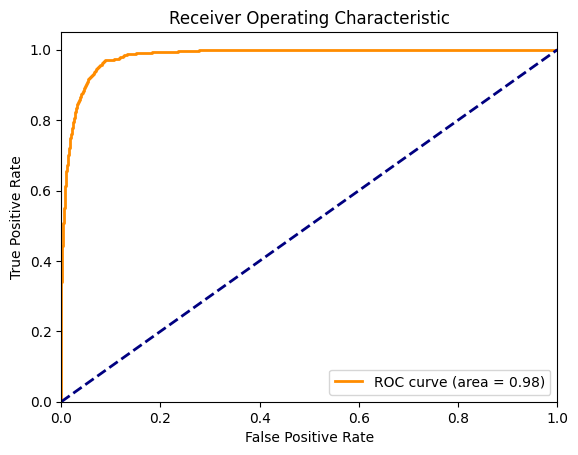

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# MODEL EVALUATION:rank order ks statistics


In [ ]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.000003
9427,0,0.738851
199,0,0.102919


In [ ]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000003,1
9427,0,0.738851,8
199,0,0.102919,7


In [ ]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

,Default Probability
count,1250.000000
mean,0.470126
std,0.189834
min,0.187045
25%,0.296824
50%,0.454017
75%,0.629155
max,0.809890


In [ ]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),
}))
df_decile.reset_index(inplace=True)
df_decile

<ipython-input-104-956f06b00cb8>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,5.409625e-10,5.112371e-07,0.0,1250.0
1,1,5.135585e-07,4.114858e-06,0.0,1250.0
2,2,4.117193e-06,2.249855e-05,0.0,1250.0
3,3,2.251434e-05,1.211895e-04,0.0,1249.0
4,4,1.214851e-04,6.323669e-04,0.0,1250.0
5,5,6.325831e-04,3.845451e-03,1.0,1249.0
6,6,3.850054e-03,2.589363e-02,6.0,1243.0
7,7,2.590052e-02,1.861598e-01,15.0,1235.0
8,8,1.870455e-01,8.098900e-01,166.0,1084.0
9,9,8.100634e-01,1.000000e+00,920.0,330.0


In [ ]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,5.409625e-10,5.112371e-07,0.0,1250.0,0.000000,100.000000
1,1,5.135585e-07,4.114858e-06,0.0,1250.0,0.000000,100.000000
2,2,4.117193e-06,2.249855e-05,0.0,1250.0,0.000000,100.000000
3,3,2.251434e-05,1.211895e-04,0.0,1249.0,0.000000,100.000000
4,4,1.214851e-04,6.323669e-04,0.0,1250.0,0.000000,100.000000
5,5,6.325831e-04,3.845451e-03,1.0,1249.0,0.080000,99.920000
6,6,3.850054e-03,2.589363e-02,6.0,1243.0,0.480384,99.519616
7,7,2.590052e-02,1.861598e-01,15.0,1235.0,1.200000,98.800000
8,8,1.870455e-01,8.098900e-01,166.0,1084.0,13.280000,86.720000
9,9,8.100634e-01,1.000000e+00,920.0,330.0,73.600000,26.400000


In [ ]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,8.100634e-01,1.000000e+00,920.0,330.0,73.600000,26.400000
1,8,1.870455e-01,8.098900e-01,166.0,1084.0,13.280000,86.720000
2,7,2.590052e-02,1.861598e-01,15.0,1235.0,1.200000,98.800000
3,6,3.850054e-03,2.589363e-02,6.0,1243.0,0.480384,99.519616
4,5,6.325831e-04,3.845451e-03,1.0,1249.0,0.080000,99.920000
5,4,1.214851e-04,6.323669e-04,0.0,1250.0,0.000000,100.000000
6,3,2.251434e-05,1.211895e-04,0.0,1249.0,0.000000,100.000000
7,2,4.117193e-06,2.249855e-05,0.0,1250.0,0.000000,100.000000
8,1,5.135585e-07,4.114858e-06,0.0,1250.0,0.000000,100.000000
9,0,5.409625e-10,5.112371e-07,0.0,1250.0,0.000000,100.000000


In [ ]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,8.100634e-01,1.000000e+00,920.0,330.0,73.600000,26.400000,920.0,330.0
1,8,1.870455e-01,8.098900e-01,166.0,1084.0,13.280000,86.720000,1086.0,1414.0
2,7,2.590052e-02,1.861598e-01,15.0,1235.0,1.200000,98.800000,1101.0,2649.0
3,6,3.850054e-03,2.589363e-02,6.0,1243.0,0.480384,99.519616,1107.0,3892.0
4,5,6.325831e-04,3.845451e-03,1.0,1249.0,0.080000,99.920000,1108.0,5141.0
5,4,1.214851e-04,6.323669e-04,0.0,1250.0,0.000000,100.000000,1108.0,6391.0
6,3,2.251434e-05,1.211895e-04,0.0,1249.0,0.000000,100.000000,1108.0,7640.0
7,2,4.117193e-06,2.249855e-05,0.0,1250.0,0.000000,100.000000,1108.0,8890.0
8,1,5.135585e-07,4.114858e-06,0.0,1250.0,0.000000,100.000000,1108.0,10140.0
9,0,5.409625e-10,5.112371e-07,0.0,1250.0,0.000000,100.000000,1108.0,11390.0


In [ ]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,8.100634e-01,1.000000e+00,920.0,330.0,73.600000,26.400000,920.0,330.0,83.032491,2.897278
1,8,1.870455e-01,8.098900e-01,166.0,1084.0,13.280000,86.720000,1086.0,1414.0,98.014440,12.414399
2,7,2.590052e-02,1.861598e-01,15.0,1235.0,1.200000,98.800000,1101.0,2649.0,99.368231,23.257243
3,6,3.850054e-03,2.589363e-02,6.0,1243.0,0.480384,99.519616,1107.0,3892.0,99.909747,34.170325
4,5,6.325831e-04,3.845451e-03,1.0,1249.0,0.080000,99.920000,1108.0,5141.0,100.000000,45.136084
5,4,1.214851e-04,6.323669e-04,0.0,1250.0,0.000000,100.000000,1108.0,6391.0,100.000000,56.110623
6,3,2.251434e-05,1.211895e-04,0.0,1249.0,0.000000,100.000000,1108.0,7640.0,100.000000,67.076383
7,2,4.117193e-06,2.249855e-05,0.0,1250.0,0.000000,100.000000,1108.0,8890.0,100.000000,78.050922
8,1,5.135585e-07,4.114858e-06,0.0,1250.0,0.000000,100.000000,1108.0,10140.0,100.000000,89.025461
9,0,5.409625e-10,5.112371e-07,0.0,1250.0,0.000000,100.000000,1108.0,11390.0,100.000000,100.000000


In [ ]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,8.100634e-01,1.000000e+00,920.0,330.0,73.600000,26.400000,920.0,330.0,83.032491,2.897278,80.135213
1,8,1.870455e-01,8.098900e-01,166.0,1084.0,13.280000,86.720000,1086.0,1414.0,98.014440,12.414399,85.600042
2,7,2.590052e-02,1.861598e-01,15.0,1235.0,1.200000,98.800000,1101.0,2649.0,99.368231,23.257243,76.110988
3,6,3.850054e-03,2.589363e-02,6.0,1243.0,0.480384,99.519616,1107.0,3892.0,99.909747,34.170325,65.739422
4,5,6.325831e-04,3.845451e-03,1.0,1249.0,0.080000,99.920000,1108.0,5141.0,100.000000,45.136084,54.863916
5,4,1.214851e-04,6.323669e-04,0.0,1250.0,0.000000,100.000000,1108.0,6391.0,100.000000,56.110623,43.889377
6,3,2.251434e-05,1.211895e-04,0.0,1249.0,0.000000,100.000000,1108.0,7640.0,100.000000,67.076383,32.923617
7,2,4.117193e-06,2.249855e-05,0.0,1250.0,0.000000,100.000000,1108.0,8890.0,100.000000,78.050922,21.949078
8,1,5.135585e-07,4.114858e-06,0.0,1250.0,0.000000,100.000000,1108.0,10140.0,100.000000,89.025461,10.974539
9,0,5.409625e-10,5.112371e-07,0.0,1250.0,0.000000,100.000000,1108.0,11390.0,100.000000,100.000000,0.000000


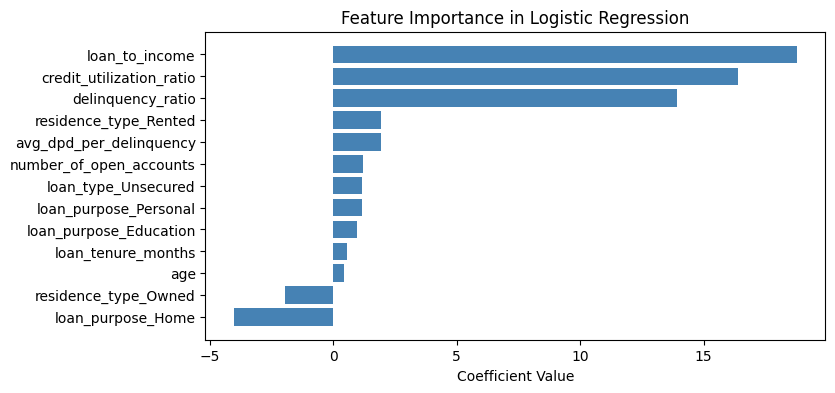

In [ ]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [ ]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346154,0.528302,0.333333,0.121212,0.257611,0.043,0.9,True,False,True,False,False,False
9427,0.288462,0.622642,1.000000,0.858586,0.688525,0.000,0.0,True,False,False,True,False,False


In [ ]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [ ]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [ ]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [ ]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, '/content/model_data.joblib')  # will be downloaded in the colab

['/content/model_data.joblib']

In [ ]:
from google.colab import files
files.download('model_data.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>